In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib

In [5]:
# This should point to the small dataset of the Kaggle Dogs vs Cats competition that was created in a previous notebook
data_folder = pathlib.Path('../data/kaggle_dogs_vs_cats_small')

### Loading Image Data into a `Dataset` class for Training

The Tensorflow `Dataset` class is TF's default method to load data. From its [docs]([Title](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)):

> The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:
>1. Create a source dataset from your input data.
>2. Apply dataset transformations to preprocess the data.
>3. Iterate over the dataset and process the elements.

>Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.

To read more about the `Dataset` class, see Tensorflow's [Data Guide](https://www.tensorflow.org/guide/data) and [Data Performance Guide](https://www.tensorflow.org/guide/data_performance).

Keras offers several utility functions to load data into TF's `Dataset` class. **See Keras [docs]([Title](https://keras.io/api/data_loading/)) for a list of all the data types that it can load**. One such utility function is the  `image_dataset_from_directory` that we use here. Note that there are additional ways to image data (see [tutorial]([Title](https://www.tensorflow.org/tutorials/load_data/images))).

## The `Dataset` class
Before we go into loading images, let's take a look at the `Dataset` class. It acts like a Python iterator, in which in each call it provides data for either training or evaluation. The data can be a single data sample, or a batch Tensorflow optimizes the performance of the data load, and covers the whole data set per epoch during training.

Here we define a data as a `NumPy` array:

In [17]:
random_numbers = np.random.normal(size=(1000, 16))

In [18]:
print(type(random_numbers))
print(random_numbers.shape)
print(random_numbers.dtype)
print(random_numbers[:4])

<class 'numpy.ndarray'>
(1000, 16)
float64
[[-1.10450295  0.39040518 -1.30588127  0.64781346 -0.62356438  0.12583678
   0.37025074  0.26652011 -1.1208503  -2.35144322  0.03437004 -0.56806569
  -1.40843637  0.23453598 -0.40459004 -1.39705322]
 [-0.65734444  0.90714534  1.23043827  0.87215199 -0.40694594  1.10025147
   0.10250156 -0.76019322 -0.52561545 -0.26850563  0.72289594  0.15617866
  -1.74269422 -1.00283338 -0.2203115  -0.38509739]
 [ 1.72253373 -0.61720183  0.06678565  0.97773244 -1.32231472 -1.68148114
   1.02589936 -1.55229945  1.56060422  0.50234872  0.69235789 -0.99453422
   0.54307751 -0.37573151  0.81596401 -0.28348508]
 [ 0.08490735 -1.52478879  1.15934115  2.19398305  0.09127395  0.21910774
   2.04659037 -1.86553369 -0.48566835 -0.36353174 -0.33688395  1.07399355
   0.05004596  0.19146399  0.73928823  0.01377482]]


Next, using the method `from_tensor_slices` we define a `Dataset` instance: 

The tensor is sliced along its first dimension, with each slice being of a single index of the first dimension
[docs](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)

In [19]:
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [20]:
type(dataset)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [2]:
for i, d in enumerate(['A','B','C']):
    print(i,d)

0 A
1 B
2 C


In [21]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [22]:
for i, element in enumerate(dataset):
    print(element)
    if i >= 2:
        break

tf.Tensor(
[-1.10450295  0.39040518 -1.30588127  0.64781346 -0.62356438  0.12583678
  0.37025074  0.26652011 -1.1208503  -2.35144322  0.03437004 -0.56806569
 -1.40843637  0.23453598 -0.40459004 -1.39705322], shape=(16,), dtype=float64)
tf.Tensor(
[-0.65734444  0.90714534  1.23043827  0.87215199 -0.40694594  1.10025147
  0.10250156 -0.76019322 -0.52561545 -0.26850563  0.72289594  0.15617866
 -1.74269422 -1.00283338 -0.2203115  -0.38509739], shape=(16,), dtype=float64)
tf.Tensor(
[ 1.72253373 -0.61720183  0.06678565  0.97773244 -1.32231472 -1.68148114
  1.02589936 -1.55229945  1.56060422  0.50234872  0.69235789 -0.99453422
  0.54307751 -0.37573151  0.81596401 -0.28348508], shape=(16,), dtype=float64)


Using this `Dataset`, we can define a `BatchDataset` instance:

In [24]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


Here every batch has 32 samples, each with 16 elements (floats)

In [25]:
type(batched_dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

### Using Keras Utility Functions to Create a `Dataset` for Images
Keras offers a utility class, `image_dataset_from_directory`, that loads images into a `Dataset` class.

**To the Student**: According to the [docs](https://keras.io/api/data_loading/image/) of `image_dataset_from_directory`:
* What folder structure does `image_dataset_from_directory` expect? 
* What is the output of `image_dataset_from_directory`?
* What is the function of the `image_size` argument?

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
type(train_dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

Displaying the shapes of the data and labels yielded by the `Dataset`:

In [8]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [30]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0])>

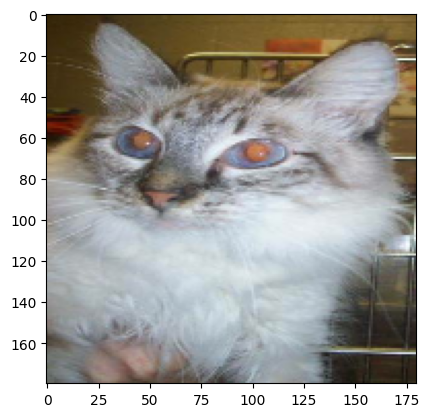

In [32]:
# import imshow
import matplotlib.pyplot as plt

plt.imshow(data_batch[0].numpy().astype("uint8"))